In [1]:
import sys
import os
import time
import warnings
import string

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
from cycler import cycler

from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow
from structure_factor.hyperuniformity import bin_data, hyperuniformity_class
from structure_factor.data import load_data
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
import structure_factor.pair_correlation_function as pcf
from structure_factor.tapers import multi_sinetaper_grid
from structure_factor.utils import meshgrid_to_column_matrix
from structure_factor.tapered_estimators import allowed_k_scattering_intensity, scattering_intensity, tapered_estimator_debiased_direct

import massPy as mp
from utils import get_defect_list, get_defect_arr_from_frame, get_frame_number
from AnalyseDefects import AnalyseDefects

plt.style.use('sg_article')


In [2]:
gin_process = GinibrePointProcess()
window = BallWindow(center=[0, 0], radius=20)
points = point_process.generate_sample(window=window)

NameError: name 'point_process' is not defined

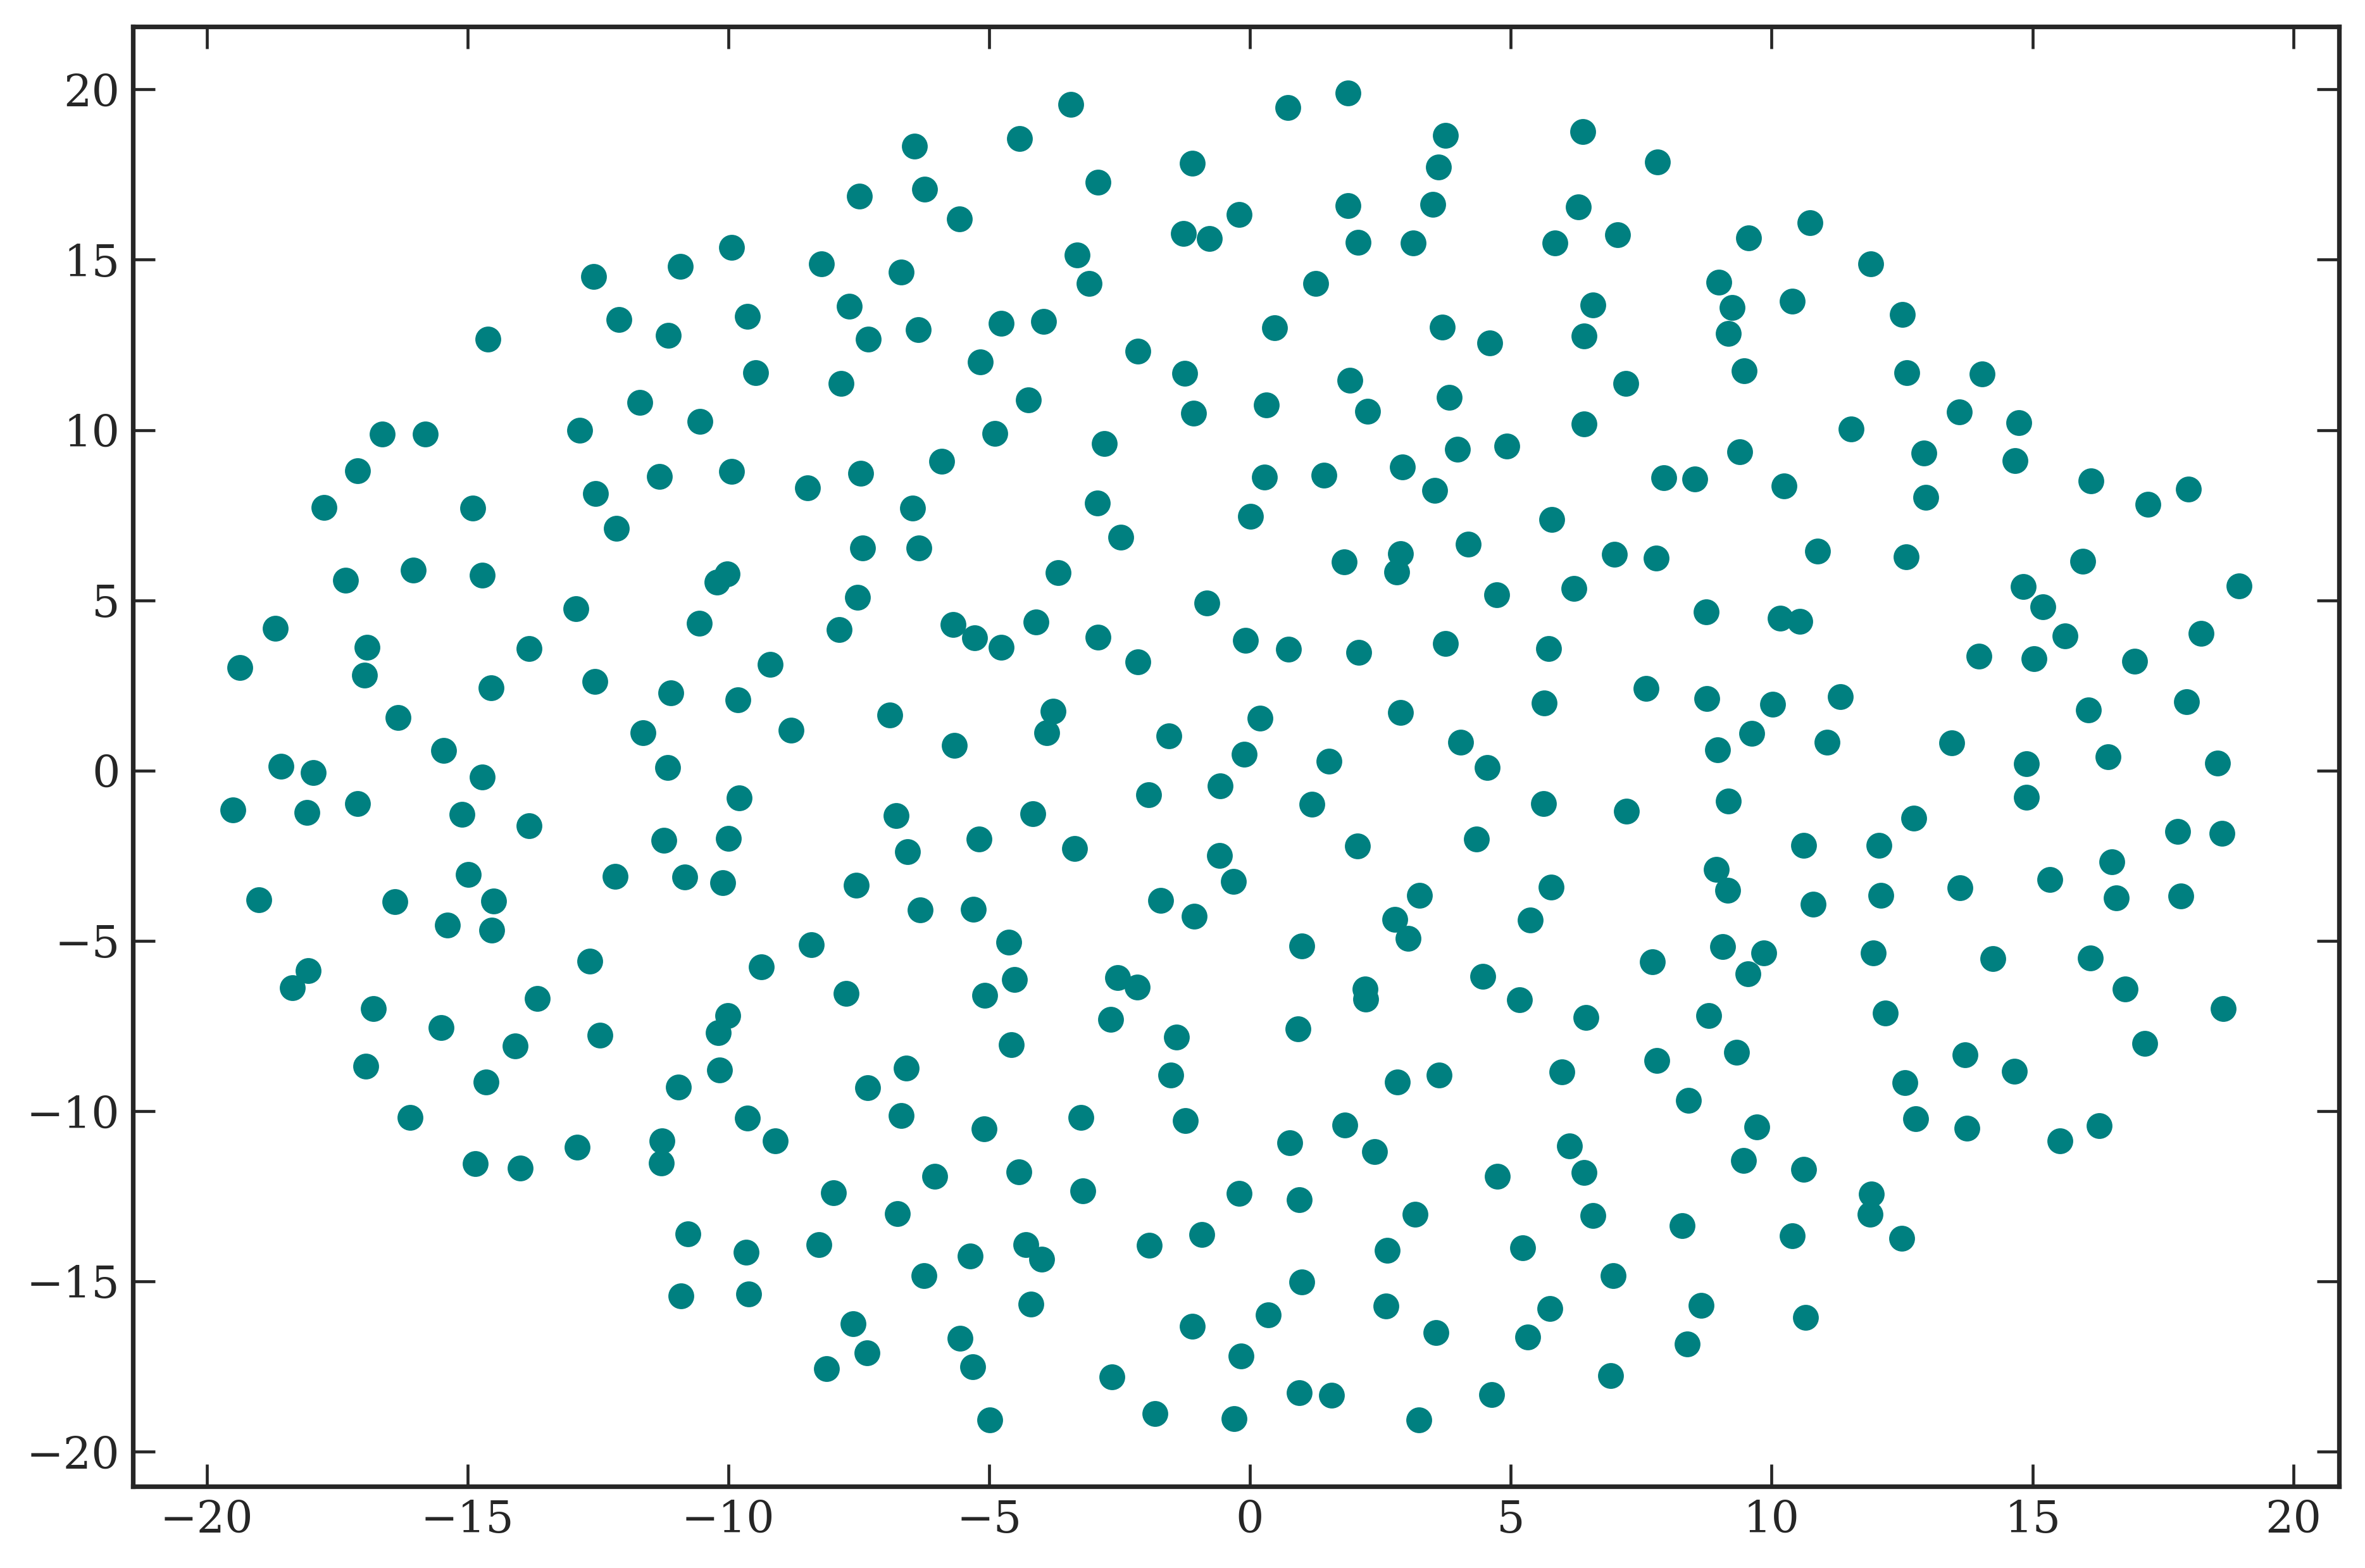

In [30]:
plt.scatter(points[:,0], points[:,1])

In [ ]:
nc = 30
Xc = np.linspace(-radius,radius, nc)
XX, YY = np.meshgrid(Xc, Xc)    
X = np.array([XX.flatten(), YY.flatten()]).T
mask = np.linalg.norm(X, axis=1) <= radius
plt.scatter(X[mask,0], X[mask,1])

In [14]:
point_pattern.points

array([[-12.3842691 ,  -8.4366364 ],
       [ 13.44030508,  -6.61747475],
       [-10.58531673, -10.31727403],
       [ 13.21640322,   7.06352997],
       [-14.533306  ,  -2.14352409],
       [-13.97676549,   4.06520662],
       [-13.38225253,   5.67479305],
       [  1.99406515,  14.48548048],
       [-11.46090971,   8.98571368],
       [ 14.0124548 ,   4.08993921],
       [ -3.94248899,  13.8833977 ],
       [-13.1155141 ,  -6.13443526],
       [  3.29973037, -14.19889479],
       [  6.38743282, -13.04968765],
       [ 11.59893739,   8.43206268],
       [  4.80809722,  13.30514622],
       [ -2.2772676 ,  14.00367074],
       [  0.19954597,  14.07743193],
       [-11.64135024,   8.00830086],
       [ -4.65109666, -13.47468944]])

In [15]:
point_pattern.dimension

2

82
(615, 2)
(615, 2)
(598, 2)
(598, 2)
(507, 2)
(507, 2)


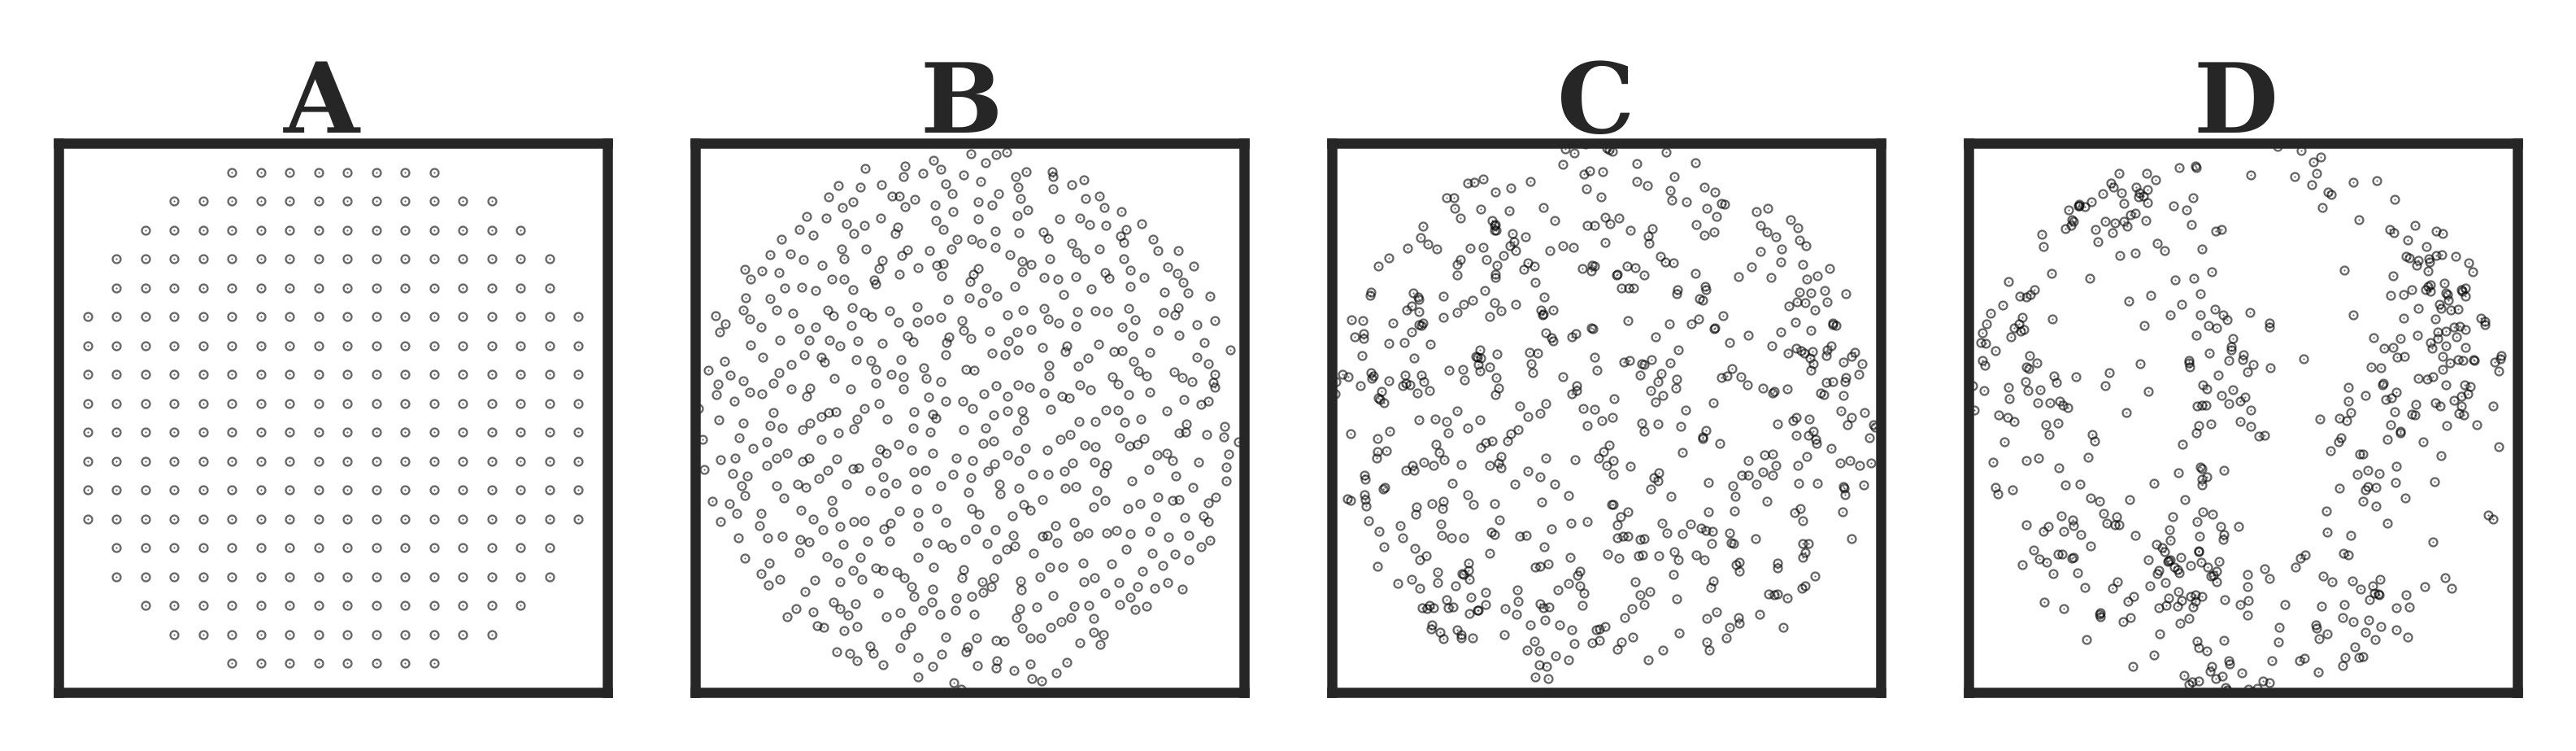

In [44]:
from matplotlib.pyplot import xlim
from structure_factor.point_processes import HomogeneousPoissonPointProcess, ThomasPointProcess, GinibrePointProcess
from structure_factor.spatial_windows import BoxWindow, BallWindow



nc = 20
intensity = .3
clustering = 0.1
radius=25
#point_process_list = [HomogeneousPoissonPointProcess(intensity=intensity), \
#ThomasPointProcess(intensity=intensity, clustering=0.1), GinibrePointProcess(intensity=intensity)]

fig, axx = plt.subplots(ncols=4, figsize=(4.5,16))
axx = axx.flatten() 

window = BallWindow(center=[0, 0], radius=radius)
point_process_list = [GinibrePointProcess, HomogeneousPoissonPointProcess, ThomasPointProcess]
kwargs_list = [dict(), dict(intensity=intensity), dict(kappa=1 / (20 * np.pi), mu=20, sigma=3)]
for i, ax in enumerate(axx):
  
    if i == 0:
        Xc = np.linspace(-radius,radius, nc)
        XX, YY = np.meshgrid(Xc, Xc)    
        X = np.array([XX.flatten(), YY.flatten()]).T
        mask = np.linalg.norm(X, axis=1) <= radius
     #   ax.scatter(X[mask,0], X[mask,1])
        point_pattern = PointPattern(X[mask], window) 
        Npoints = int(0.3 * X[mask].shape[0])
        print(Npoints)
    else:
        point_process = point_process_list[i-1](**kwargs_list[i-1])
        point_pattern = point_process.generate_point_pattern(window=window)
        print(point_pattern.points.shape)
       # point_pattern.points = point_pattern.points[:Npoints]
        print(point_pattern.points.shape)
    point_pattern.plot(ax, alpha = .6, s=.05)
    #ax.scatter(point_pattern[:,0], point_pattern[:,1])
    ax.set_aspect("equal", "box")
    ax.grid('False')
    #ax.set_title(point_process.__class__.__name__)
    # Turn off the axis including ticks
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set(xlim = (-radius, radius), ylim = (-radius, radius))

for n, ax in enumerate(axx):
    ax.text(.41, 1.02, string.ascii_uppercase[n], transform=ax.transAxes,
    size=12, weight='bold')

#plt.tight_layout(pad=1)
fig.tight_layout()
fig.dpi = 720 